## Generating Line Flux Maps

In [1]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs

import matplotlib.pyplot as plt

from hetdex_tools.interpolate import make_narrowband_image
from hetdex_tools.phot_tools import fit_circular_aperture

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline

### Make a collapased wavelength image at the line detection wavelength and coordinate

In [33]:
detectid=3006432566
hdu = make_narrowband_image(detectid=detectid, 
                            include_error=True, 
                            imsize=20.*u.arcsec,
                            convolve_image=False)

In [34]:
im = hdu[0].data
w = wcs.WCS(hdu[0].header)

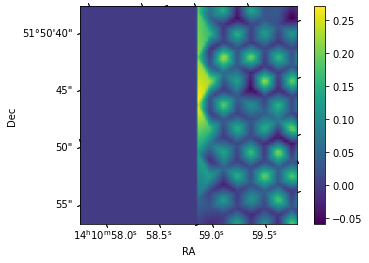

In [35]:
plt.subplot(111, projection=w)
plt.imshow(im)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.colorbar()

In [36]:
coords = SkyCoord( ra = hdu[0].header['CRVAL1']*u.deg, dec=hdu[0].header['CRVAL2']*u.deg)

### Can fit a circular aperture to the detection to get the line image S/N relative to sky background in an annulus around the detection

Signal-to-noise in circular aperture is 2.358


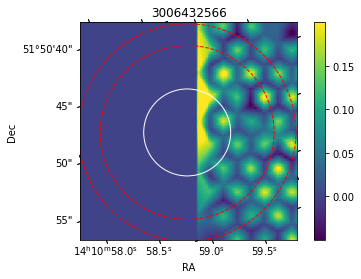

In [37]:
flux, flux_err, bkg_stddev, apcor = fit_circular_aperture(hdu, coords, 
                                                          radius=4.*u.arcsec, 
                                                          annulus=[8,10]*u.arcsec,
                                                          plot=True, plottitle=str(detectid))
print('Signal-to-noise in circular aperture is {:5.3f}'.format(flux/bkg_stddev))

In [38]:
flux, flux_err, bkg_stddev, apcor, sky_sigma = fit_circular_aperture(hdu, coords, 
                                                          radius=4.*u.arcsec, 
                                                          annulus=[8,10]*u.arcsec,
                                                          return_sky_sigma=True)

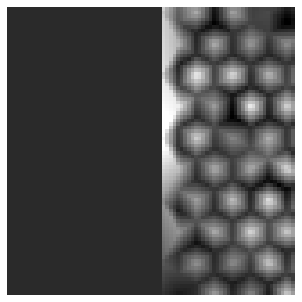

In [46]:
plt.subplot(111, projection=w)
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.imshow(im, vmin=-1.*sky_sigma, vmax=5*sky_sigma, cmap=plt.get_cmap("gray"))
plt.savefig("test.jpg", bbox_inches = 'tight',
    pad_inches = 0)

In [17]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None, metadata=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    fname : str or PathLike or file-like object
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is not set, then the output format is inferred from
        the extension of *fname*, if any, and from :rc:`savefig.format`
        otherwise.  If *format* is set, it determines the output format.
    
        Hence, if *fname* is not a path or has no extension, remember to
        spe

To save the datacube:

In [9]:
hdu.writeto('{}_line_flux_map.fits'.format(detectid), overwrite=True)

## For get_line_image Options:

In [15]:
help(make_narrowband_image)

Help on function make_narrowband_image in module hetdex_tools.interpolate:

make_narrowband_image(detectid=None, coords=None, shotid=None, pixscale=<Quantity 0.25 arcsec>, imsize=<Quantity 30. arcsec>, wave_range=None, convolve_image=True, ffsky=True, subcont=False, dcont=50.0, include_error=False, survey='hdr3', extract_class=None)
    Function to make narrowband image from either a detectid or from a
    coordinate/shotid combination.
    
    Paramaters
    ----------
    detectid: int
        detectid from the continuum or lines catalog. Default is
        None. Provide a coords/shotid combo if this isn't given
    coords: SkyCoords object
        coordinates to define the centre of the data cube
    pixscale: astropy angle quantity
         plate scale
    imsize: astropy angle quantity
        image size
    wave_range: list or None
        start and stop value for the wavelength range in Angstrom.
        If not given, the detectid linewidth is used
    convolve_image: bool
    